# Project 2


# Movie Genre Classification

Classify a movie genre based on its plot.

<img src="moviegenre.png"
     style="float: left; margin-right: 10px;" />




https://www.kaggle.com/c/miia4200-20191-p2-moviegenreclassification/overview


### Data

Input:
- movie plot

Output:
Probability of the movie belong to each genre


### Evaluation

- 20% API
- 30% Create a solution using with a Machine Learning algorithm - Presentation (5 slides)
- 50% Performance in the Kaggle competition (Normalized acording to class performance in the private leaderboard)


### Acknowledgements

We thank Professor Fabio Gonzalez, Ph.D. and his student John Arevalo for providing this dataset.

See https://arxiv.org/abs/1702.01992

## Sample Submission

In [4]:
import pandas as pd
import os
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import r2_score, roc_auc_score
from sklearn.model_selection import train_test_split, cross_val_score
import matplotlib.pyplot as plt
import xgboost as xgb
from nltk.stem import WordNetLemmatizer
from nltk.stem.snowball import SnowballStemmer
import nltk


In [5]:
dataTraining = pd.read_csv('https://github.com/albahnsen/PracticalMachineLearningClass/raw/master/datasets/dataTraining.zip', encoding='UTF-8', index_col=0)
dataTesting = pd.read_csv('https://github.com/albahnsen/PracticalMachineLearningClass/raw/master/datasets/dataTesting.zip', encoding='UTF-8', index_col=0)

In [6]:
dataTraining.head()

,year,title,plot,genres,rating
3107,2003,Most,most is the story of a single father who takes...,"['Short', 'Drama']",8.0
900,2008,How to Be a Serial Killer,a serial killer decides to teach the secrets o...,"['Comedy', 'Crime', 'Horror']",5.6
6724,1941,A Woman's Face,"in sweden , a female blackmailer with a disfi...","['Drama', 'Film-Noir', 'Thriller']",7.2
4704,1954,Executive Suite,"in a friday afternoon in new york , the presi...",['Drama'],7.4
2582,1990,Narrow Margin,"in los angeles , the editor of a publishing h...","['Action', 'Crime', 'Thriller']",6.6


In [7]:
dataTesting.head()

,year,title,plot
1,1999,Message in a Bottle,"who meets by fate , shall be sealed by fate ...."
4,1978,Midnight Express,"the true story of billy hayes , an american c..."
5,1996,Primal Fear,martin vail left the chicago da ' s office to ...
6,1950,Crisis,husband and wife americans dr . eugene and mr...
7,1959,The Tingler,the coroner and scientist dr . warren chapin ...


### Create y

In [8]:
dataTraining['genres'] = dataTraining['genres'].map(lambda x: eval(x))
le = MultiLabelBinarizer()
y_genres = le.fit_transform(dataTraining['genres'])
print(y_genres.shape)
y_genres

(7895, 24)


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       ...,
       [0, 1, 0, ..., 0, 0, 0],
       [0, 1, 1, ..., 0, 0, 0],
       [0, 1, 1, ..., 0, 0, 0]])

0    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

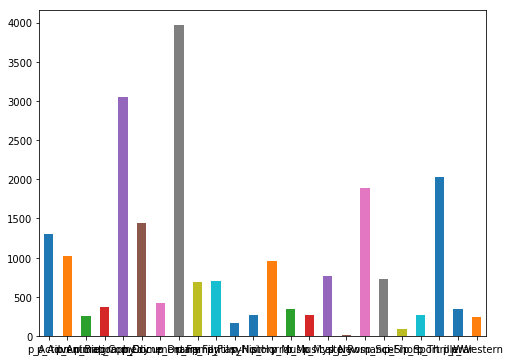

In [9]:
cols = ['p_Action', 'p_Adventure', 'p_Animation', 'p_Biography', 'p_Comedy', 'p_Crime', 'p_Documentary', 'p_Drama', 'p_Family',
        'p_Fantasy', 'p_Film-Noir', 'p_History', 'p_Horror', 'p_Music', 'p_Musical', 'p_Mystery', 'p_News', 'p_Romance',
        'p_Sci-Fi', 'p_Short', 'p_Sport', 'p_Thriller', 'p_War', 'p_Western']
train_DFY = pd.DataFrame(y_genres, columns=cols)
pd.Series(train_DFY.sum().plot(kind = "bar",figsize=(8,6),rot = 0))

# Graficar en lineas cada genero por año

# Build the features
### Create count vectorizer


In [21]:
dataTraining.iloc[1,2] + " "+ dataTraining.iloc[1,1] + " "+str(dataTraining.iloc[1,0])


'a serial killer decides to teach the secrets of his satisfying career to a video store clerk . How to Be a Serial Killer 2008'

In [66]:
# This function transform the text in order get ready data, remove stop words, stimming, Lemmatisation and n_grams
# This function is call by the count vectorizer
def vector_func(text):
    wordnet_lemmatizer = WordNetLemmatizer()
    stemmer = SnowballStemmer('english')
    text = text.lower()
    words = text.split()
    
    #Remove clean_words
    words = [word for word in words if word not in waste_words]
    
    #N_gramas     
    ngrams = zip(*[words[i:] for i in range(2)])
    n_gamas = ( [" ".join(ngram) for ngram in ngrams])
    
    #Remove stop words
    words = [word for word in words if word not in custom_stopwords]

    for index in range(0, len(words)-1, 1):
        #stimming
        words[index] = stemmer.stem(words[index]) 
        #Lemmatisation
        words[index] = wordnet_lemmatizer.lemmatize(words[index],pos='v') 
        words[index] = wordnet_lemmatizer.lemmatize(words[index])
    
    return words + n_gamas

# The next lines are just for test the function
#var = dataTraining.iloc[1,2]
var = dataTraining.iloc[1,2] + " "+ dataTraining.iloc[1,1] + " "+str(dataTraining.iloc[1,0])
print(var)
vector_func(var)

a serial killer decides to teach the secrets of his satisfying career to a video store clerk . How to Be a Serial Killer 2008


['serial',
 'killer',
 'decid',
 'teach',
 'secret',
 'satisfi',
 'career',
 'video',
 'store',
 'clerk',
 'serial',
 'killer',
 '2008',
 'a serial',
 'serial killer',
 'killer decides',
 'decides to',
 'to teach',
 'teach the',
 'the secrets',
 'secrets of',
 'of his',
 'his satisfying',
 'satisfying career',
 'career to',
 'to a',
 'a video',
 'video store',
 'store clerk',
 'clerk how',
 'how to',
 'to be',
 'be a',
 'a serial',
 'serial killer',
 'killer 2008']

In [67]:
#vect = CountVectorizer(ngram_range=(1, 2), stop_words='english')
#vect = CountVectorizer(analyzer=vector_func, max_features=50000,  min_df=2)
vect = CountVectorizer(analyzer=vector_func)
X_dtm = vect.fit_transform(dataTraining['plot']+ " "+dataTraining['title']+ " "+str(dataTraining['year']))
X_dtm.shape

(7895, 443154)

In [68]:
vect.get_feature_names()

['#$*!',
 '#$*! do',
 '$20',
 '$20 million',
 '$5',
 '$5 a',
 "'66 3107",
 "'73 3107",
 "'77 3107",
 "'79 3107",
 "'burbs 3107",
 "'em high",
 "'em up",
 "'high sign'",
 "'n' roll",
 "'night, mother",
 "'northwest passage'",
 "'o' the",
 "'r",
 "'r treat",
 "'r xmas",
 "'round midnight",
 "'superman' 3107",
 "'til there",
 '(and',
 '(and 10',
 "(and don't",
 '(and why',
 '(book',
 '(book i',
 '(full',
 '(full sequence)',
 '(k)now!?',
 '(k)now!? 3107',
 '(the',
 '(the unexpected',
 '*',
 '* but',
 '*(not',
 '*(not his',
 '*batteri',
 '*batteries not',
 '--',
 "-- rogers'",
 '...',
 '... 2500',
 '... who',
 '...all',
 '...all the',
 '.45',
 '.45 3107',
 '1',
 '1 2',
 '1 3107',
 '1/3:',
 '1/3: the',
 '10',
 '10 3107',
 '10 from',
 '10 things',
 '10 tips',
 '10 to',
 '10 years',
 '10,000',
 '10,000 bc',
 '100',
 '100 feet',
 '100 girls',
 '100 rifles',
 '1000',
 '1000 corpses',
 '1001',
 '1001 rabbit',
 '101',
 '101 3107',
 '101 dalmatians',
 '102',
 '102 dalmatians',
 '10426',
 '10426 200

### Split train and test

In [69]:
X_train, X_test, y_train_genres, y_test_genres = train_test_split(X_dtm, y_genres, test_size=0.33, random_state=42)
X_train.shape

(5289, 443154)

### Train multi-class multi-label model Random Forest

In [ ]:
# Cross validation to find the best depth parameter 
max_depth_range = range(8, 30, 2)
RMSE_scores_featu = []

for depth in max_depth_range:
    clf = OneVsRestClassifier(RandomForestClassifier(n_jobs=-1, n_estimators=1000, max_depth=depth, random_state=42))
    RMSE_scores_featu.append(cross_val_score(clf, X_train, y_train_genres, cv=3, scoring='roc_auc').mean())

best_maxdepth = max_depth_range[RMSE_scores_featu.index(max(RMSE_scores_featu))]
print ("best_maxdepth: ", best_maxdepth)
plt.plot(max_depth_range, RMSE_scores_featu)
plt.xlabel('MAX FEATURES')
plt.ylabel('NEG_RMSE')

In [70]:
clf = OneVsRestClassifier(RandomForestClassifier(n_jobs=-1, n_estimators=800, max_depth=25, random_state=42))
clf.fit(X_train, y_train_genres)

OneVsRestClassifier(estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=25, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=800, n_jobs=-1,
            oob_score=False, random_state=42, verbose=0, warm_start=False),
          n_jobs=None)

In [71]:
y_pred_genres = clf.predict_proba(X_test)

In [72]:
roc_auc_score(y_test_genres, y_pred_genres, average='macro')
#Alejandro: 0.7812262183677007
#Kaggle: 0.8305484760297258
#last: 0.8235390459619446

0.8224421228291902

In [68]:
## Train with full data
clf.fit(X_dtm, y_genres)

OneVsRestClassifier(estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=25, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=800, n_jobs=-1,
            oob_score=False, random_state=42, verbose=0, warm_start=False),
          n_jobs=None)

## xgboost

In [ ]:
# Train the model
xg_clf = OneVsRestClassifier(xgb.XGBClassifier(objective ='binary:logistic', max_depth = 25, n_estimators = 1000))
xg_clf.fit(X_train, y_train_genres)

In [ ]:
y_pred_xgboost = xg_clf.predict(data_dmatrix_test)
y_pred_xgboost

In [ ]:
roc_auc_score(y_test_genres, y_pred_xgboost, average='macro')

### Predict the testing dataset

In [69]:
X_test_dtm = vect.transform(dataTesting['plot'])
y_pred_test_genres = clf.predict_proba(X_test_dtm)

In [70]:
cols = ['p_Action', 'p_Adventure', 'p_Animation', 'p_Biography', 'p_Comedy', 'p_Crime', 'p_Documentary', 'p_Drama', 'p_Family',
        'p_Fantasy', 'p_Film-Noir', 'p_History', 'p_Horror', 'p_Music', 'p_Musical', 'p_Mystery', 'p_News', 'p_Romance',
        'p_Sci-Fi', 'p_Short', 'p_Sport', 'p_Thriller', 'p_War', 'p_Western']

res = pd.DataFrame(y_pred_test_genres, index=dataTesting.index, columns=cols)

In [71]:
res.head()

,p_Action,p_Adventure,p_Animation,p_Biography,p_Comedy,p_Crime,p_Documentary,p_Drama,p_Family,p_Fantasy,...,p_Musical,p_Mystery,p_News,p_Romance,p_Sci-Fi,p_Short,p_Sport,p_Thriller,p_War,p_Western
1,0.137525,0.107825,0.023585,0.036578,0.377782,0.150005,0.039564,0.511793,0.072551,0.076582,...,0.024740,0.080168,0.000170,0.249540,0.069584,0.006086,0.021664,0.221540,0.029397,0.019529
4,0.138830,0.105451,0.023585,0.047096,0.358016,0.177812,0.040283,0.515654,0.077292,0.073583,...,0.024740,0.076760,0.002020,0.198359,0.070275,0.006372,0.021664,0.231196,0.031809,0.019529
5,0.138667,0.106120,0.023585,0.038531,0.297281,0.304420,0.040667,0.601549,0.073898,0.076791,...,0.027537,0.124946,0.001306,0.233015,0.079394,0.008405,0.022950,0.329360,0.034804,0.020876
6,0.141220,0.108069,0.023636,0.039094,0.335997,0.158256,0.039245,0.565415,0.073367,0.073647,...,0.027174,0.083341,0.000079,0.214762,0.083228,0.005972,0.023026,0.255059,0.034060,0.020755
7,0.153365,0.128506,0.030415,0.037783,0.356837,0.190852,0.042983,0.431751,0.084561,0.095681,...,0.025959,0.091124,0.000289,0.203513,0.164026,0.007978,0.021664,0.241321,0.029397,0.019529


In [72]:
res.to_csv('pred_genres_text_RF.csv', index_label='ID')

In [65]:
custom_stopwords =['a', 'about', 'above', 'across', 'after', 'afterwards', 'again',
       'against', 'ain', 'all', 'almost', 'alone', 'along', 'already',
       'also', 'although', 'always', 'am', 'among', 'amongst', 'amoungst',
       'amount', 'an', 'and', 'another', 'any', 'anyhow', 'anyone',
       'anything', 'anyway', 'anywhere', 'are', 'aren', "aren't",
       'around', 'as', 'at', 'back', 'be', 'became', 'because', 'become',
       'becomes', 'becoming', 'been', 'before', 'beforehand', 'behind',
       'being', 'below', 'beside', 'besides', 'between', 'beyond', 'bill',
       'both', 'bottom', 'but', 'by', 'call', 'can', 'cannot', 'cant',
       'co', 'con', 'could', 'couldn', "couldn't", 'couldnt', 'cry', 'd',
       'de', 'describe', 'detail', 'did', 'didn', "didn't", 'do', 'does',
       'doesn', "doesn't", 'doing', 'don', "don't", 'done', 'down', 'due',
       'during', 'each', 'eg', 'eight', 'either', 'eleven', 'else',
       'elsewhere', 'empty', 'enough', 'etc', 'even', 'ever', 'every',
       'everyone', 'everything', 'everywhere', 'except', 'few', 'fifteen',
       'fifty', 'fill', 'find', 'fire', 'first', 'five', 'for', 'former',
       'formerly', 'forty', 'found', 'four', 'from', 'front', 'full',
       'further', 'get', 'give', 'go', 'had', 'hadn', "hadn't", 'has',
       'hasn', "hasn't", 'hasnt', 'have', 'haven', "haven't", 'having',
       'he', 'hence', 'her', 'here', 'hereafter', 'hereby', 'herein',
       'hereupon', 'hers', 'herself', 'him', 'himself', 'his', 'how',
       'however', 'hundred', 'i', 'ie', 'if', 'in', 'inc', 'indeed',
       'interest', 'into', 'is', 'isn', "isn't", 'it', "it's", 'its',
       'itself', 'just', 'keep', 'last', 'latter', 'latterly', 'least',
       'less', 'll', 'ltd', 'm', 'ma', 'made', 'many', 'may', 'me',
       'meanwhile', 'might', 'mightn', "mightn't", 'mill', 'mine', 'more',
       'moreover', 'most', 'mostly', 'move', 'much', 'must', 'mustn',
       "mustn't", 'my', 'myself', 'name', 'namely', 'needn', "needn't",
       'neither', 'never', 'nevertheless', 'next', 'nine', 'no', 'nobody',
       'none', 'noone', 'nor', 'not', 'nothing', 'now', 'nowhere', 'o',
       'of', 'off', 'often', 'on', 'once', 'one', 'only', 'onto', 'or',
       'other', 'others', 'otherwise', 'our', 'ours', 'ourselves', 'out',
       'over', 'own', 'part', 'per', 'perhaps', 'please', 'put', 'rather',
       're', 's', 'same', 'see', 'seem', 'seemed', 'seeming', 'seems',
       'serious', 'several', 'shan', "shan't", 'she', "she's", 'should',
       "should've", 'shouldn', "shouldn't", 'show', 'side', 'since',
       'sincere', 'six', 'sixty', 'so', 'some', 'somehow', 'someone',
       'something', 'sometime', 'sometimes', 'somewhere', 'still', 'such',
       'system', 't', 'take', 'ten', 'than', 'that', "that'll", 'the',
       'their', 'theirs', 'them', 'themselves', 'then', 'thence', 'there',
       'thereafter', 'thereby', 'therefore', 'therein', 'thereupon',
       'these', 'they', 'thick', 'thin', 'third', 'this', 'those',
       'though', 'three', 'through', 'throughout', 'thru', 'thus', 'to',
       'together', 'too', 'top', 'toward', 'towards', 'twelve', 'twenty',
       'two', 'un', 'under', 'until', 'up', 'upon', 'us', 've', 'very',
       'via', 'was', 'wasn', "wasn't", 'we', 'well', 'were', 'weren',
       "weren't", 'what', 'whatever', 'when', 'whence', 'whenever',
       'where', 'whereafter', 'whereas', 'whereby', 'wherein',
       'whereupon', 'wherever', 'whether', 'which', 'while', 'whither',
       'who', 'whoever', 'whole', 'whom', 'whose', 'why', 'will', 'with',
       'within', 'without', 'won', "won't", 'would', 'wouldn', "wouldn't",
       'y', 'yet', 'you', "you'd", "you'll", "you're", "you've", 'your',
       'yours', 'yourself', 'yourselves']

waste_words =['!',
 '"',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '=',
 '?',
 'a$$',
 'a&m',
 'aa',
 'aaa',
 'aam',
 '+',
 'aang']

In [209]:

# #Cross validarion on train dataset
# params = {"objective":"multi:softprob",
#           #'colsample_bytree': 0.3,
#           #'learning_rate': 0.1,
#           'nthread': 4,
#           'eval_metric':'auc',
#           #'alpha': 10,
#           'num_class': 24,
#           'max_depth': 25}

# data_dmatrix_train = xgb.DMatrix(data=X_train, label=y_train_genres)
# data_dmatrix_test = xgb.DMatrix(X_test)
#xg_clf2 = xgb.train(params=params, dtrain=data_dmatrix_train, num_boost_round=300)
# cv_results = xgb.cv(dtrain=data_dmatrix_train, params=params, nfold=3,
#                     num_boost_round=100, early_stopping_rounds=20, as_pandas=True, 
#                     stratified=True, seed=42)
# cv_results
# from sklearn.model_selection import GridSearchCV
# xgb_param=dict([(key,[params[key]]) for key in params])
# cvresult = GridSearchCV(xg_clf2, xgb_param, cv=3)
# cvresult.fit(X_train,y_train_genres)
# cvresult.best_estimator_
# diabetes = load_diabetes()

# X = diabetes.data
# y = diabetes.target

# xgb_model = xgb.XGBRegressor()

# params = {
#     "colsample_bytree": uniform(0.7, 0.3),
#     "gamma": uniform(0, 0.5),
#     "learning_rate": uniform(0.03, 0.3), # default 0.1 
#     "max_depth": randint(2, 6), # default 3
#     "n_estimators": randint(100, 150), # default 100
#     "subsample": uniform(0.6, 0.4)
# }

# search = RandomizedSearchCV(xgb_model, param_distributions=params, random_state=42, n_iter=200, cv=3, verbose=1, n_jobs=1, return_train_score=True)

# search.fit(X, y)

# report_best_scores(search.cv_results_, 1)